In [1]:
%matplotlib inline
import os
import pdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

from plot_utils import load_dataset_params, select_meas, plt_acc_boxscatter, comput_meas_table, add_letters, obtain_dfs


In [2]:
rootpth = '.../xdc_runs/'
dat_type = 'test' # 'train', test'
save_fig = False
verbosity = 1
use_stats = False
dat_type_d = {'train':'Train ', 'test':'Test '}
dat_type_d_num = {'train':0, 'test':1}
dataset = 'eeg_arm' # 'naturalistic', 'eeg_arm', 'fingerflex', 'eeg_balance_all3_v2'
measure = 'acc'
markers = ['o','d','^','X','P','v']
subfolders_d = {'naturalistic' : ['naturalistic_supervised_run1', 'naturalistic_sep_run1',
                                  'naturalistic_xdc_run1'],
                'eeg_arm' : ['eeg_arm_supervised_run1', 'eeg_arm_sep_run1',
                             'eeg_arm_xdc_run1'],
                'fingerflex' : ['fingerflex_supervised_run1', 'fingerflex_sep_run1',
                                'fingerflex_xdc_run1'],
                'eeg_balance': ['eeg_mocap_balance_supervised_run1', 'eeg_mocap_balance_sep_run1',
                                'eeg_mocap_balance_xdc_run1'],
                'eeg_balance_all3': ['eeg_balance_all3_supervised_run1', 'eeg_balance_all3_sep_run1',
                                     'eeg_balance_all3_xdc_run1']}

assert dataset in ['naturalistic', 'eeg_arm', 'fingerflex', 'eeg_balance']

if dataset == 'eeg_balance_all3_v2':
    datasets = ['eeg_balance', 'eeg_balance_all3']
else:
    datasets = [dataset]


/home/stepeter/anaconda3/envs/pytorch/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/stepeter/anaconda3/envs/pytorch/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(



EEG 
1.7312503468457488e-06
                          Cross-modal\n(with pose)  Supervised  Unimodal
Cross-modal\n(with pose)                       NaN    0.003357  0.000092
Supervised                                     NaN         NaN  0.000092
Unimodal                                       NaN         NaN       NaN
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Unimodal v.s. Cross-modal
(with pose): Custom statistical test, P_val:9.155e-05
Supervised v.s. Unimodal: Custom statistical test, P_val:9.155e-05
Supervised v.s. Cross-modal
(with pose): Custom statistical test, P_val:3.357e-03

Pose 
9.64549483749183e-06
                         Cross-modal\n(with EEG)  Supervised  Unimodal
Cross-modal\n(with EEG)                      NaN    0.001646  0.001646
Supervised                                   NaN         NaN  0.765087
Unimodal                                     

/home/stepeter/anaconda3/envs/pytorch/lib/python3.8/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/stepeter/anaconda3/envs/pytorch/lib/python3.8/site-packages/scipy/stats/morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


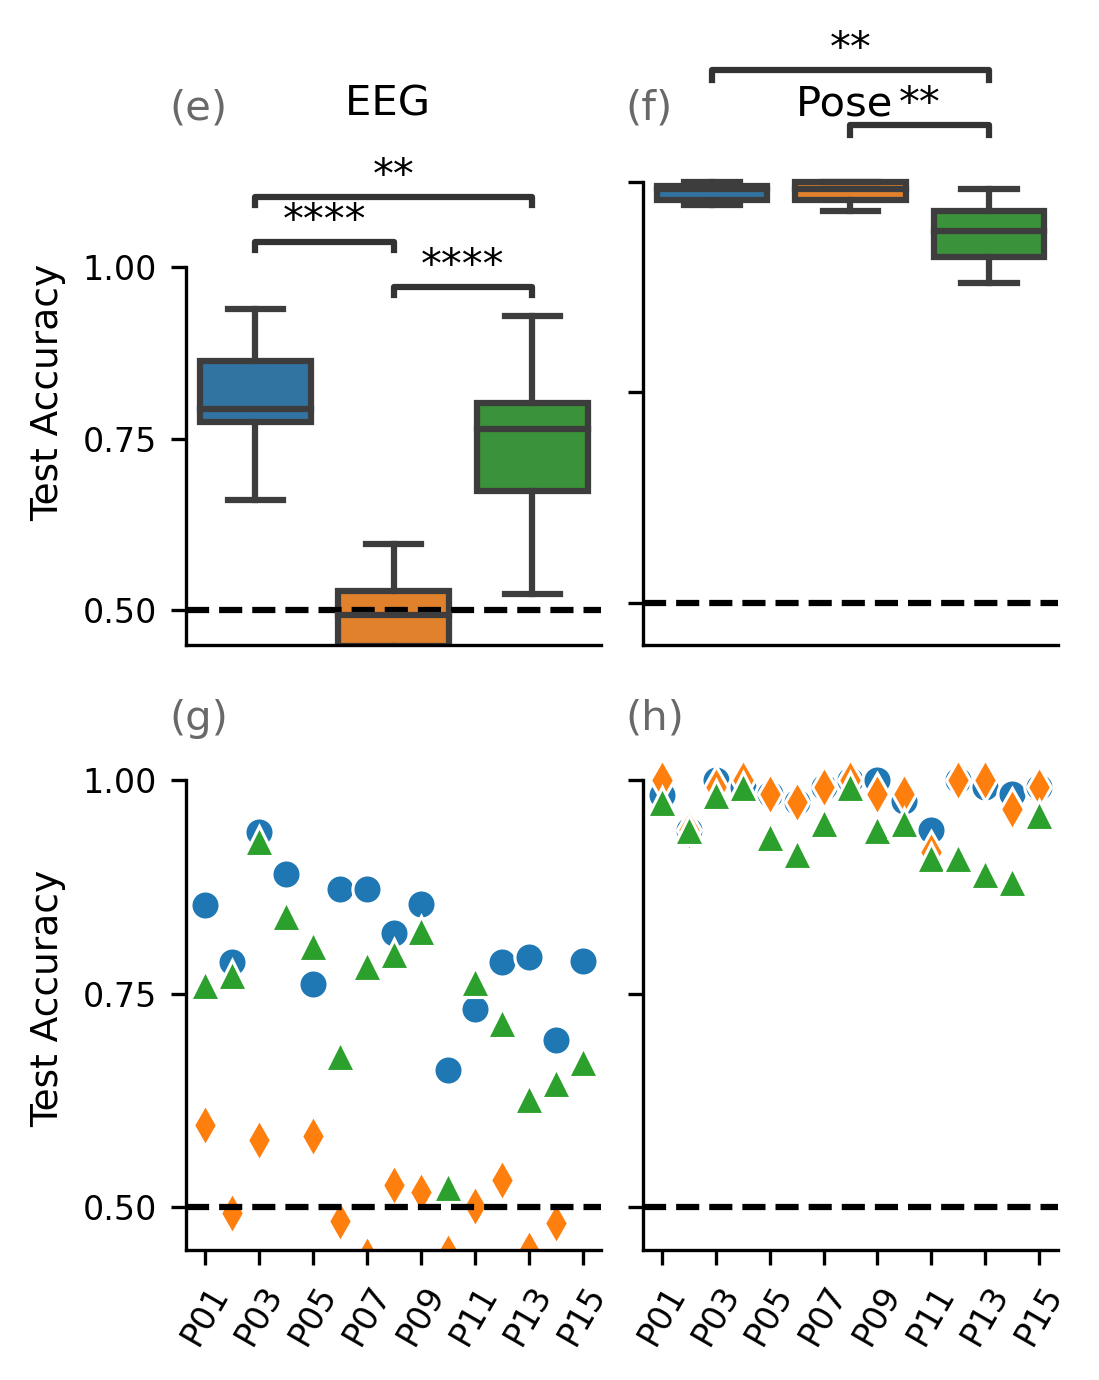

In [3]:
for i, dst in enumerate(datasets):
    n_cls, row_labels, group_labels, sbjs_all, n_modspair = load_dataset_params(dst)
    meas_l = select_meas(measure, dat_type_d, dat_type)

    subfolders = subfolders_d[dst]

    df_list, grp_list = obtain_dfs(subfolders, sbjs_all, n_modspair, group_labels,
                                   dst, rootpth, dat_type_d_num, dat_type,
                                   subfolders_d, measure='acc')
    
    if i > 0:
        df_neur2, df_pose2, df_emg2 = df_list
        group_labs_neur2, group_labs_pose2, group_labs_emg2 = grp_list
        group_labs_neur = np.hstack((group_labs_neur,group_labs_neur2[-1]+'\n(All 3)'))
        group_labs_pose = np.hstack((group_labs_pose,group_labs_pose2[-1]+'\n(All 3)'))
        group_labs_emg = np.hstack((group_labs_emg,group_labs_emg2[-1]+'\n(All 3)'))
        df_neur[group_labs_neur[-1]] = df_neur2[group_labs_neur2[-1]]
        df_pose[group_labs_pose[-1]] = df_pose2[group_labs_pose2[-1]]
        df_emg[group_labs_emg[-1]] = df_emg2[group_labs_emg2[-1]]
    else:
        df_neur, df_pose, df_emg = df_list
        group_labs_neur, group_labs_pose, group_labs_emg = grp_list


ncols = 2 if dataset != 'eeg_balance_all3_v2' else 3
hspace = 0.2
ylim_lo = 0.45 if dataset in ['naturalistic', 'eeg_arm'] else 0
ylim_hi = 1.05
yticks = [0.5, 0.75, 1] if dataset in ['naturalistic', 'eeg_arm'] else [0,.5,1]
width = 7.5/2 if dataset != 'eeg_balance_all3_v2' else 4
height = 5.5 if dataset == 'eeg_balance_all3_v2' else 4.9

xticks_sbj = ['P'+str(val+1).zfill(2) for val in range(len(sbjs_all))]
fig, ax = plt.subplots(2,ncols,dpi=300,figsize=(width, height),
                       gridspec_kw={'wspace': 0.1, 'hspace': hspace})
palette = sns.color_palette()
curr_palette = palette[:len(group_labs_neur)]
curr_palette = curr_palette if dataset != 'eeg_balance_all3_v2' else itemgetter(0,1,2,3,5)(palette)
marks = markers
plt_acc_boxscatter(df_neur, n_cls=n_cls, yticks=yticks, ylim_lo=ylim_lo, axes=(ax[0,0], ax[1,0]),
                   row_label=row_labels[0], meas_l=meas_l, group_labs=group_labs_neur,
                   curr_palette=curr_palette, yticklabs=True, use_stats=use_stats, ylim_hi=ylim_hi,
                   measure=measure, sbjs_all=sbjs_all, dataset=dataset, xticks_sbj=xticks_sbj,
                   verbosity=verbosity, markers=marks)


curr_palette = palette[:len(group_labs_neur)] if dataset != 'eeg_balance_all3_v2' else itemgetter(0,1,2,4,5)(palette)
marks = markers if dataset != 'eeg_balance_all3_v2' else markers[:3]+[markers[5]]+[markers[4]]
plt_acc_boxscatter(df_pose, n_cls=n_cls, yticks=yticks, ylim_lo=ylim_lo, axes=(ax[0,1], ax[1,1]),
                   row_label=row_labels[1], meas_l=meas_l, group_labs=group_labs_pose,
                   curr_palette=curr_palette, yticklabs=False, use_stats=use_stats, ylim_hi=ylim_hi,
                   measure=measure, sbjs_all=sbjs_all, dataset=dataset, xticks_sbj=xticks_sbj,
                   verbosity=verbosity, markers=marks)

if dataset == 'eeg_balance_all3_v2':
    marks = markers if dataset != 'eeg_balance_all3_v2' else markers[:2]+[markers[3]]+[markers[5]]+[markers[4]]
    curr_palette = palette[:len(group_labs_neur)] if dataset != 'eeg_balance_all3_v2' else itemgetter(0,1,3,4,5)(palette)
    plt_acc_boxscatter(df_emg, n_cls=n_cls, yticks=yticks, ylim_lo=ylim_lo, axes=(ax[0,2], ax[1,2]),
                       row_label=row_labels[2], meas_l=meas_l, group_labs=group_labs_emg,
                       curr_palette=curr_palette, yticklabs=False, use_stats=use_stats, ylim_hi=ylim_hi,
                       measure=measure, sbjs_all=sbjs_all, dataset=dataset, xticks_sbj=xticks_sbj,
                       verbosity=verbosity, markers=marks)

for col in range(ncols):
    for row in range(2):
        ax[row,col].spines['right'].set_visible(False)
        ax[row,col].spines['top'].set_visible(False)    

add_letters(dataset)
plt.show()

# Save figure
fig_sp = rootpth+'figs/'
fig_name = dataset+'_'+measure
if save_fig:
    fig.savefig(fig_sp+fig_name+'.eps',
                format='eps',  transparent= True,dpi=300,
                bbox_inches = 'tight', pad_inches = 0.01,
                )


### Print mean+-SD for each condition

In [4]:
def print_pm(df_in):
    means = df_in.mean()
    stds = df_in.std()
    for i in range(len(means)):
        print('{0:.2f}+-{1:.2f}'.format(means[i],stds[i]))

print('Neural')
print_pm(df_neur)
print('')
print('Pose')
print_pm(df_pose)

if df_emg is not None:
    print('')
    print('EMG')
    print_pm(df_emg)

Neural
0.81+-0.08
0.50+-0.06
0.74+-0.10

Pose
0.98+-0.02
0.98+-0.02
0.94+-0.04


## Show numeric v-measure results

In [4]:
meas_tab = 'vscore'
df_out = None
if dataset != 'eeg_balance_all3_v2':
    df_out = comput_meas_table(meas_tab, subfolders_d, dataset, sbjs_all, rootpth, dat_type_d_num,
                               dat_type, group_labels, ncols, row_labels, n_modspair)
df_out
